Introduccion al problema

In [82]:
# %pip install gymnasium

### Windows:

method 1

In [83]:
# %pip install swig

In [84]:
# %pip install gymnasium[box2d]

method 2

In [85]:
# %pip install swig

In [86]:
# %pip install ufal.pybox2d

In [87]:
# %pip install pygame

### Linux:

In [88]:
# %pip install gymnasium[box2d]

https://gymnasium.farama.org/environments/box2d/lunar_lander/

In [89]:
from lunar import LunarLanderEnv

Tensorflow or Torch

In [90]:
import torch

In [91]:
# Initialize the environment
lunar = LunarLanderEnv()
print(type(lunar.env.observation_space))
print(type(lunar.env.action_space))

<class 'gymnasium.spaces.box.Box'>
<class 'gymnasium.spaces.discrete.Discrete'>


El espacio de acciones es un valor del 0 al 3 que indica que acciones tomará el modulo lunar para esa iteración.

en concreto son las siguientes:

|value| action                        |
|-----|-------------------------------|
| 0   | do nothing                    |
| 1   | fire left orientation engine  |
| 2   | fire main engine              |
| 3   | fire right orientation engine |


In [92]:
lunar.env.action_space

Discrete(4)

El espacio de observaciones son un conjunto de valores flotantes y booleanos que indica el estado del modulo lunar.

en concreto son las siguientes:

|value| observation                               |
|-----|-------------------------------------------|
| 0   | coordenada X (float)                      |
| 1   | coordenada Y (float)                      |
| 2   | velocidad lineal X (float)                |
| 3   | velocidad lineal Y (float)                |
| 4   | Angulo en radianes desde -2π a +2π (float)|
| 5   | Velocidad angula (float)                  |
| 6   | Contacto de la pierna Izquierda (bool)    |
| 7   | Contacto de la pierna Derecha (bool)      |

In [93]:
# se muestran los valores minimos y maximos del espacio de observaciones.
lunar.env.observation_space

Box([ -2.5        -2.5       -10.        -10.         -6.2831855 -10.
  -0.         -0.       ], [ 2.5        2.5       10.        10.         6.2831855 10.
  1.         1.       ], (8,), float32)

In [94]:
observation_count = lunar.env.observation_space.shape[0] 
action_count = lunar.env.action_space.n

print(f"observations: {observation_count}, actions: {action_count}")

observations: 8, actions: 4


In [95]:
#valores minimos y maximos para las observaciones.
print(lunar.env.observation_space.low) 
print(lunar.env.observation_space.high)

[ -2.5        -2.5       -10.        -10.         -6.2831855 -10.
  -0.         -0.       ]
[ 2.5        2.5       10.        10.         6.2831855 10.
  1.         1.       ]


Sample ofrece una combinacion aleatoria del conjunto.

In [96]:
print(lunar.env.action_space.sample())  # Take a random action

3


In [97]:
print(lunar.env.observation_space.sample())  # Sample a random observation

[-2.0846174  -0.7159975  -1.5421224   1.3059497   2.208979    0.1070467
  0.9194312   0.45537207]


Running a random episode.

In [98]:
def test_lunar_lander(steps_to_run_before_pause, agent, episodes=1):
    """
    Test the Lunar Lander environment with a given agent.
    
    Parameters:
    steps_to_run_before_pause (int): Number of steps to run before pausing for user input.
    agent: The agent to be tested in the environment.
    
    Returns:
    None
    """
    # Initialize the environment
    lunar = LunarLanderEnv(render_mode="human")
    
    if(agent is not None):
        # Set the agent's environment
        agent.lunar = lunar
        
    for _ in range(episodes):
        counter, score = 0, 0

        while True:
            if steps_to_run_before_pause != 0 and counter % steps_to_run_before_pause == 0:
                import time
                time.sleep(0.6)

            if(agent is not None):
                _, reward, done, action = agent.act()
                
            else:
                # Sample a random action from the action space
                action = lunar.env.action_space.sample()
            
                # Take a step in the environment
                _, reward, done = lunar.take_action(action, verbose=True)
                
            score += reward
            
            counter += 1
            
            if done:
                print(f"Episode finished, score: {score}")
                break
        if(agent is not None):
            # Reset the agent's environment for the next episode
            agent.lunar.reset()
        else:
            # Reset the environment for the next episode
            lunar.reset()
        
    # Close the environment
    lunar.close()

In [99]:
test_lunar_lander(steps_to_run_before_pause=0, agent=None, episodes=1)

Step taken: 3, New state: [ 0.00749998  1.4100753   0.38414922 -0.03174819 -0.01014361 -0.11686195
  0.          0.        ], Reward: -1.4314567938317555, Done: False
Step taken: 1, New state: [ 0.01120319  1.4087684   0.37419677 -0.05811556 -0.0139821  -0.07677673
  0.          0.        ], Reward: 0.39199694200363067, Done: False
Step taken: 2, New state: [ 0.01497869  1.4079939   0.3811403  -0.0344604  -0.0175248  -0.07086041
  0.          0.        ], Reward: -0.9815536262407705, Done: False
Step taken: 1, New state: [ 0.01869202  1.4066195   0.3733261  -0.06111259 -0.01949776 -0.03946297
  0.          0.        ], Reward: 0.345690260062413, Done: False
Step taken: 2, New state: [ 0.02233896  1.4053217   0.36705756 -0.05770978 -0.02183004 -0.04664987
  0.          0.        ], Reward: 0.2640630204521813, Done: False
Step taken: 3, New state: [ 0.02608118  1.4034107   0.37899736 -0.08500854 -0.02655846 -0.09457747
  0.          0.        ], Reward: -2.002969025565305, Done: False
St

DQN

In [100]:
from DQN import DQNAgent
lunar = LunarLanderEnv(render_mode=None)



Train

In [ ]:
#Los parametros más importantes son los marcados con un comentario
agent = DQNAgent(lunar)
# agent.load_model("modelos/modelo_DQN.h5") <- si se quiere seguir entrenando el modelo anteriormente guardado
agent.train(nombre_archivo="modelos/modelo_DQN", save_graphs=True, save_every_500=True)

Using device: cpu
QNetwork:
 DQN(
  (model): Sequential(
    (0): Linear(in_features=8, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=4, bias=True)
  )
)


Test

In [ ]:
# agent with epsilon = 0.0 (no exploration)
agent = DQNAgent(lunar, epsilon=0.0)
agent.load_model("modelos/modelo_DQN.h5")

Using device: cpu
QNetwork:
 DQN(
  (model): Sequential(
    (0): Linear(in_features=8, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=4, bias=True)
  )
)


In [103]:
test_lunar_lander(steps_to_run_before_pause=0, agent=agent, episodes=1)

Episode finished, score: -807.2185796937321
Environment closed.


In [104]:
import matplotlib.pyplot as plt

def evaluate_agent(agent, episodes=100):
    rewards = []
    lunar = LunarLanderEnv(render_mode=None)
    
    if(agent is not None):
        # Set the agent's environment
        agent.lunar = lunar
        
    for _ in range(episodes):
        counter, score = 0, 0

        while True:


            if(agent is not None):
                _, reward, done, action = agent.act()
                
            else:
                # Sample a random action from the action space
                action = lunar.env.action_space.sample()
            
                # Take a step in the environment
                _, reward, done = lunar.take_action(action, verbose=True)
                
            score += reward
            
            counter += 1
            
            if done:
                print(f"Episode finished, score: {score}")
                rewards.append(score)
                break
        if(agent is not None):
            # Reset the agent's environment for the next episode
            agent.lunar.reset()
        else:
            # Reset the environment for the next episode
            lunar.reset()
        
    # Close the environment
    
    lunar.close()
    return rewards

def calculate_resolution_percentage(rewards):
    """
    Calculates the percentage of episodes where the total score was greater than 100.
    """
    resolved_episodes = sum(1 for reward in rewards if reward >= 100)
    total_episodes = len(rewards)
    if total_episodes == 0:
        return 0
    return (resolved_episodes / total_episodes) * 100


colors = ['#e377c2', '#8c564b', '#1f77b4', '#2ca02c', '#d62728', '#9467bd']



In [105]:
'''
rewards_0 = evaluate_agent(agent)
plt.figure(figsize=(12, 6))
plt.plot(rewards_0, label='Último probado', color=colors[0])
plt.title('Evaluación del agente con la última configuracion en 100 episodios')
plt.xlabel('Episodio')
plt.ylabel('Recompensa total')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print("\n--- Resolution Percentage (Score > 100) ---")
print(f"Último probado: {calculate_resolution_percentage(rewards_0):.2f}%")
'''

'\nrewards_0 = evaluate_agent(agent)\nplt.figure(figsize=(12, 6))\nplt.plot(rewards_0, label=\'Último probado\', color=colors[0])\nplt.title(\'Evaluación del agente con la última configuracion en 100 episodios\')\nplt.xlabel(\'Episodio\')\nplt.ylabel(\'Recompensa total\')\nplt.legend()\nplt.grid(True)\nplt.tight_layout()\nplt.show()\nprint("\n--- Resolution Percentage (Score > 100) ---")\nprint(f"Último probado: {calculate_resolution_percentage(rewards_0):.2f}%")\n'

Using device: cpu
QNetwork:
 DQN(
  (model): Sequential(
    (0): Linear(in_features=8, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=4, bias=True)
  )
)
Model loaded from modelos/Google colab 1/modelo_DQN.h5
Episode finished, score: -569.5622418316677
Episode finished, score: -302.53054637097097
Episode finished, score: -348.7128063003384
Episode finished, score: -785.4715189441612
Episode finished, score: -439.6803558699675
Episode finished, score: -298.81380186676995
Episode finished, score: -592.716546770584
Episode finished, score: -238.7755607770799
Episode finished, score: -93.3723335704199
Episode finished, score: -520.5377626968427
Episode finished, score: -344.8771194874458
Episode finished, score: -378.9998365818691
Episode finished, score: -406.93978025610284
Episode finished, score: -258.3411760072033
Episode finished, score: -402.4226770347214
Episode

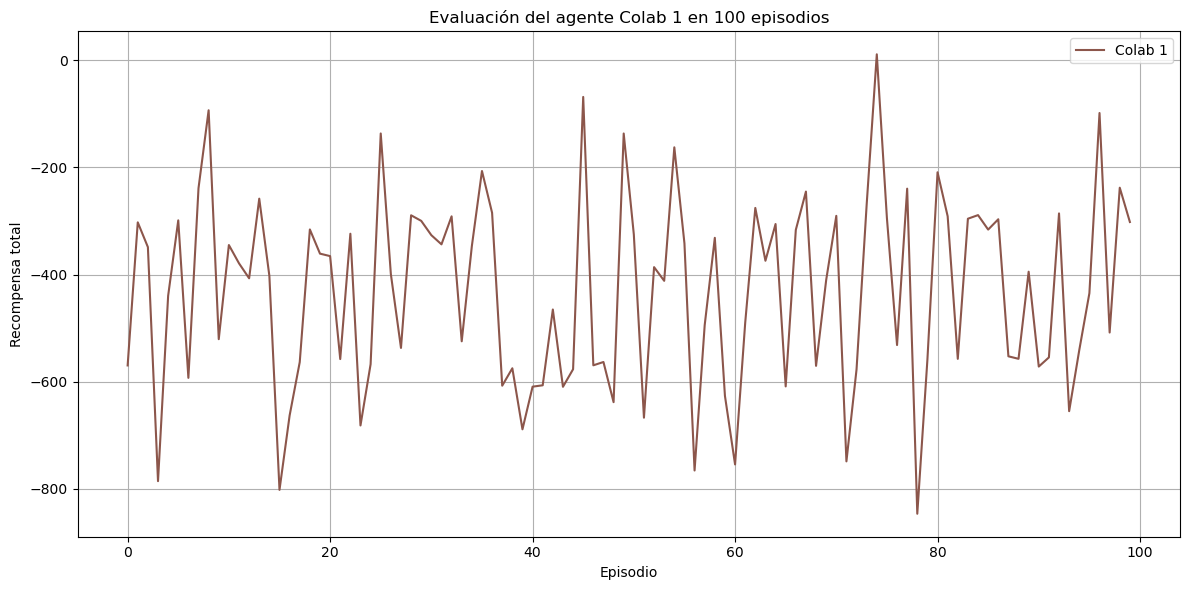


--- Resolution Percentage (Score > 100) ---
Colab 1: 0.00%


In [106]:
agent_colab1 = DQNAgent(lunar,epsilon=0.0, hidden_size=256)
agent_colab1.load_model("modelos/Google colab 1/modelo_DQN.h5")
rewards_1 = evaluate_agent(agent_colab1)
plt.figure(figsize=(12, 6))
plt.plot(rewards_1, label='Colab 1', color=colors[1])
plt.title('Evaluación del agente Colab 1 en 100 episodios')
plt.xlabel('Episodio')
plt.ylabel('Recompensa total')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print("\n--- Resolution Percentage (Score > 100) ---")
print(f"Colab 1: {calculate_resolution_percentage(rewards_1):.2f}%")

Using device: cpu
QNetwork:
 DQN(
  (model): Sequential(
    (0): Linear(in_features=8, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=4, bias=True)
  )
)
Model loaded from modelos/Google colab 2/modelo_DQN.h5
Episode finished, score: 293.01572320103196
Episode finished, score: 270.23842622560767
Episode finished, score: 239.63374949637125
Episode finished, score: 240.731079095221
Episode finished, score: 249.2155170656834
Episode finished, score: 249.32020332986863
Episode finished, score: -67.17029065073012
Episode finished, score: 160.86688191642395
Episode finished, score: 267.4072055532921
Episode finished, score: 279.07139727879735
Episode finished, score: 276.2430265235877
Episode finished, score: 241.1851262399358
Episode finished, score: 237.0684007102643
Episode finished, score: 268.657570242469
Episode finished, score: 262.0547608284917
Episode finished, 

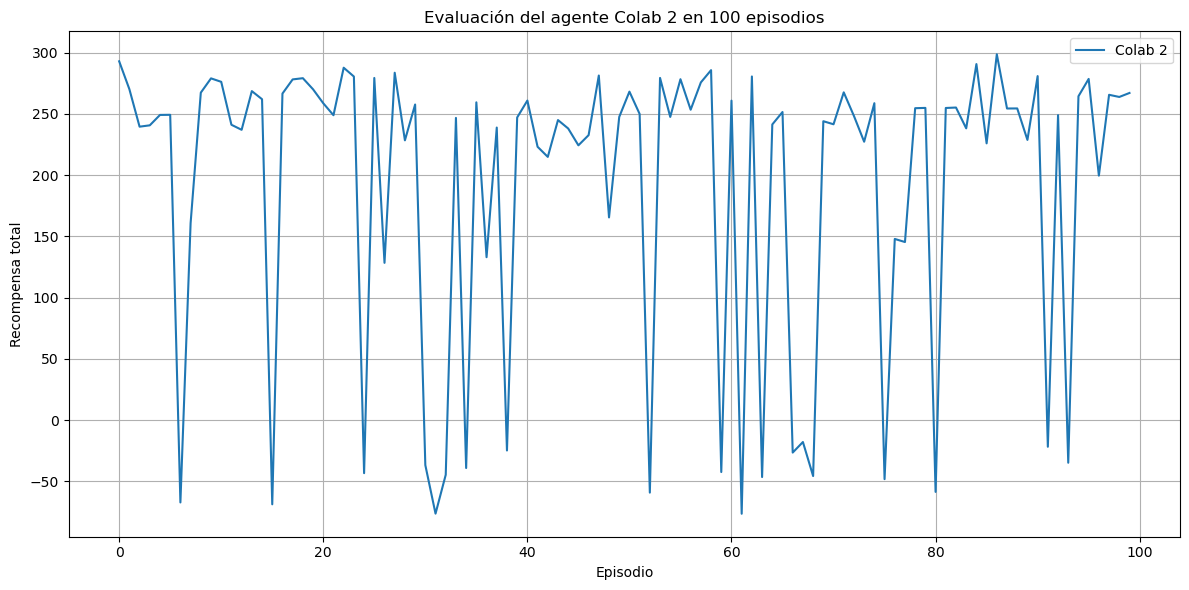


--- Resolution Percentage (Score > 100) ---
Colab 2: 81.00%


In [107]:

agent_colab2 = DQNAgent(lunar,epsilon=0.0, hidden_size=128)
agent_colab2.load_model("modelos/Google colab 2/modelo_DQN.h5")
rewards_2 = evaluate_agent(agent_colab2)
plt.figure(figsize=(12, 6))
plt.plot(rewards_2, label='Colab 2', color=colors[2])
plt.title('Evaluación del agente Colab 2 en 100 episodios')
plt.xlabel('Episodio')
plt.ylabel('Recompensa total')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print("\n--- Resolution Percentage (Score > 100) ---")
print(f"Colab 2: {calculate_resolution_percentage(rewards_2):.2f}%")


Using device: cpu
QNetwork:
 DQN(
  (model): Sequential(
    (0): Linear(in_features=8, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=4, bias=True)
  )
)
Model loaded from modelos/Google colab 3/modelo_DQN.h5
Episode finished, score: -44.40315773977697
Episode finished, score: 9.452677040325094
Episode finished, score: 2.050934476691853
Episode finished, score: 31.744206443082597
Episode finished, score: -37.9477419824367
Episode finished, score: -11.90943534496306
Episode finished, score: -34.762810284452655
Episode finished, score: -0.5286753338599999
Episode finished, score: 8.392220298369997
Episode finished, score: -40.74120569996055
Episode finished, score: 9.927874753627936
Episode finished, score: -16.541472210992318
Episode finished, score: 24.242896642852404
Episode finished, score: 37.26717662306046
Episode finished, score: 10.932156921172881
Episode fin

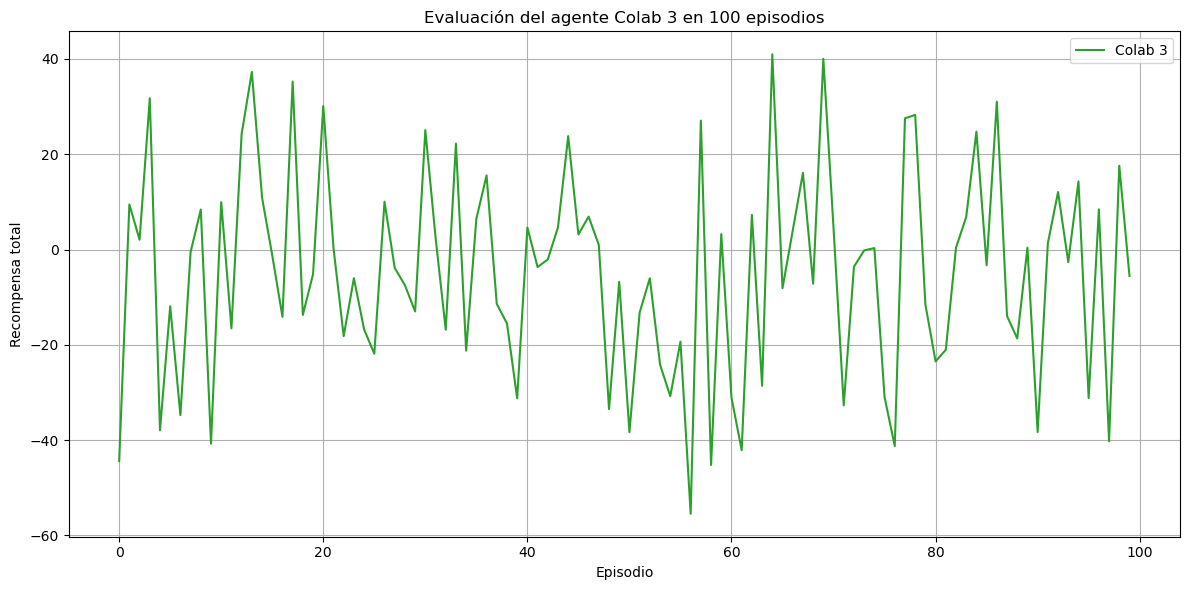


--- Resolution Percentage (Score > 100) ---
Colab 3: 0.00%


In [108]:


agent_colab3 = DQNAgent(lunar,epsilon=0.0, hidden_size=128)
agent_colab3.load_model("modelos/Google colab 3/modelo_DQN.h5")
rewards_3 = evaluate_agent(agent_colab3)
plt.figure(figsize=(12, 6))
plt.plot(rewards_3, label='Colab 3', color=colors[3])
plt.title('Evaluación del agente Colab 3 en 100 episodios')
plt.xlabel('Episodio')
plt.ylabel('Recompensa total')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print("\n--- Resolution Percentage (Score > 100) ---")
print(f"Colab 3: {calculate_resolution_percentage(rewards_3):.2f}%")


Using device: cpu
QNetwork:
 DQN(
  (model): Sequential(
    (0): Linear(in_features=8, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=4, bias=True)
  )
)
Model loaded from modelos/Google colab 4/modelo_DQN.h5
Episode finished, score: 253.07077640590188
Episode finished, score: 274.0915593689632
Episode finished, score: 265.6348839559922
Episode finished, score: 273.1014826905341
Episode finished, score: 196.22894119623868
Episode finished, score: 255.12659366627503
Episode finished, score: 268.9451920729349
Episode finished, score: 271.41422338213084
Episode finished, score: 266.252656795544
Episode finished, score: 206.64748236703582
Episode finished, score: 271.83358965451174
Episode finished, score: 220.2120252390916
Episode finished, score: 220.7576373064502
Episode finished, score: 275.40947457789366
Episode finished, score: 280.4124518094341
Episode finished,

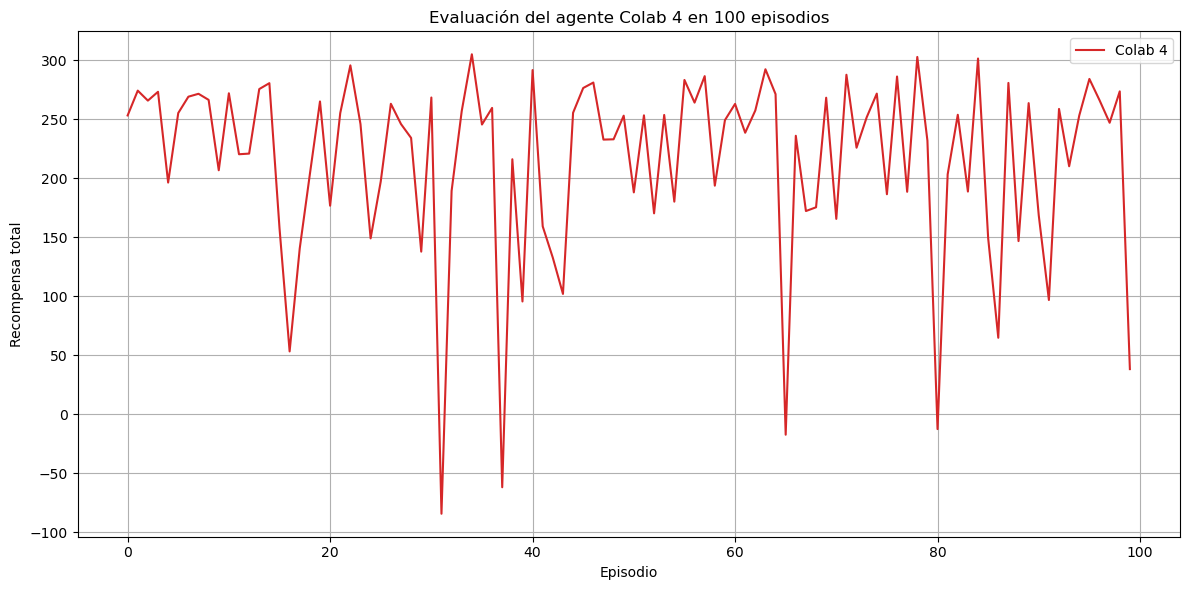


--- Resolution Percentage (Score > 100) ---
Colab 4: 91.00%


In [109]:

agent_colab4 = DQNAgent(lunar,epsilon=0.0, hidden_size=256)
agent_colab4.load_model("modelos/Google colab 4/modelo_DQN.h5")
rewards_4 = evaluate_agent(agent_colab4)
plt.figure(figsize=(12, 6))
plt.plot(rewards_4, label='Colab 4', color=colors[4])
plt.title('Evaluación del agente Colab 4 en 100 episodios')
plt.xlabel('Episodio')
plt.ylabel('Recompensa total')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print("\n--- Resolution Percentage (Score > 100) ---")
print(f"Colab 4: {calculate_resolution_percentage(rewards_4):.2f}%")

Using device: cpu
QNetwork:
 DQN(
  (model): Sequential(
    (0): Linear(in_features=8, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=4, bias=True)
  )
)
Model loaded from modelos/Google colab 5/modelo_DQN.h5
Episode finished, score: -98.42771462486103
Episode finished, score: -17.200145005511235
Episode finished, score: -42.219852803330205
Episode finished, score: -11.641486080814438
Episode finished, score: -75.75389625371848
Episode finished, score: -86.45854418237062
Episode finished, score: -114.63478984094934
Episode finished, score: -90.14426216315051
Episode finished, score: -78.39727875909031
Episode finished, score: -73.33474871443369
Episode finished, score: -92.850659068541
Episode finished, score: -18.063454656894226
Episode finished, score: -147.2026911649989
Episode finished, score: -81.29480273508763
Episode finished, score: -106.38743901241276
Episode 

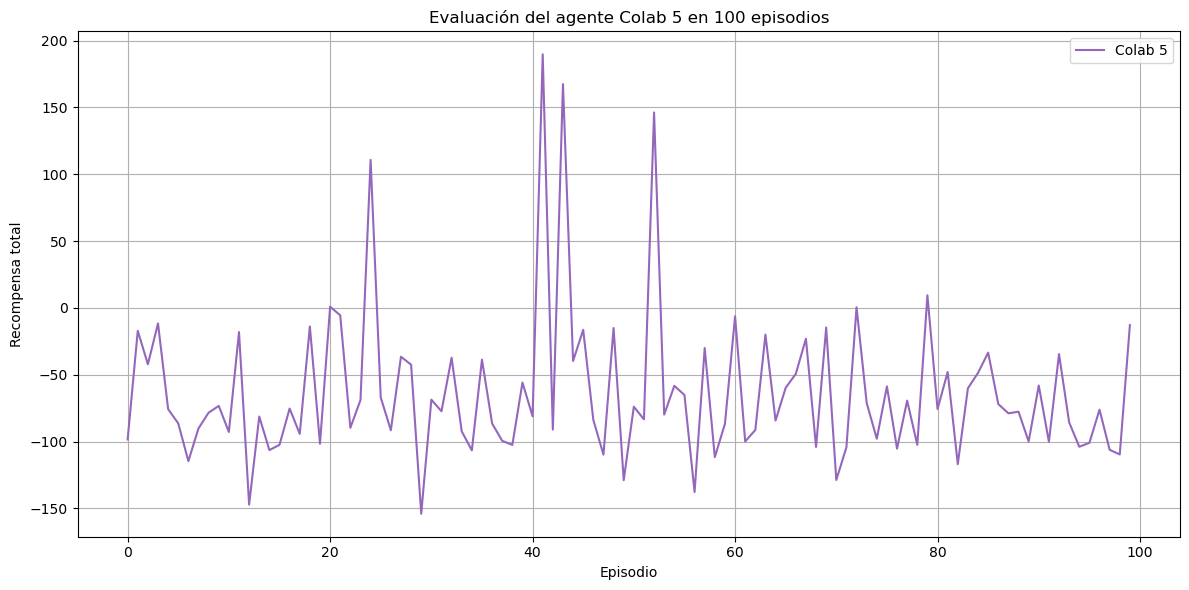


--- Resolution Percentage (Score > 100) ---
Colab 5: 4.00%


In [110]:
agent_colab5 = DQNAgent(lunar,epsilon=0.0, hidden_size=64)
agent_colab5.load_model("modelos/Google colab 5/modelo_DQN.h5")
rewards_5 = evaluate_agent(agent_colab5)
plt.figure(figsize=(12, 6))
plt.plot(rewards_5, label='Colab 5', color=colors[5])
plt.title('Evaluación del agente Colab 5 en 100 episodios')
plt.xlabel('Episodio')
plt.ylabel('Recompensa total')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print("\n--- Resolution Percentage (Score > 100) ---")
print(f"Colab 5: {calculate_resolution_percentage(rewards_5):.2f}%")

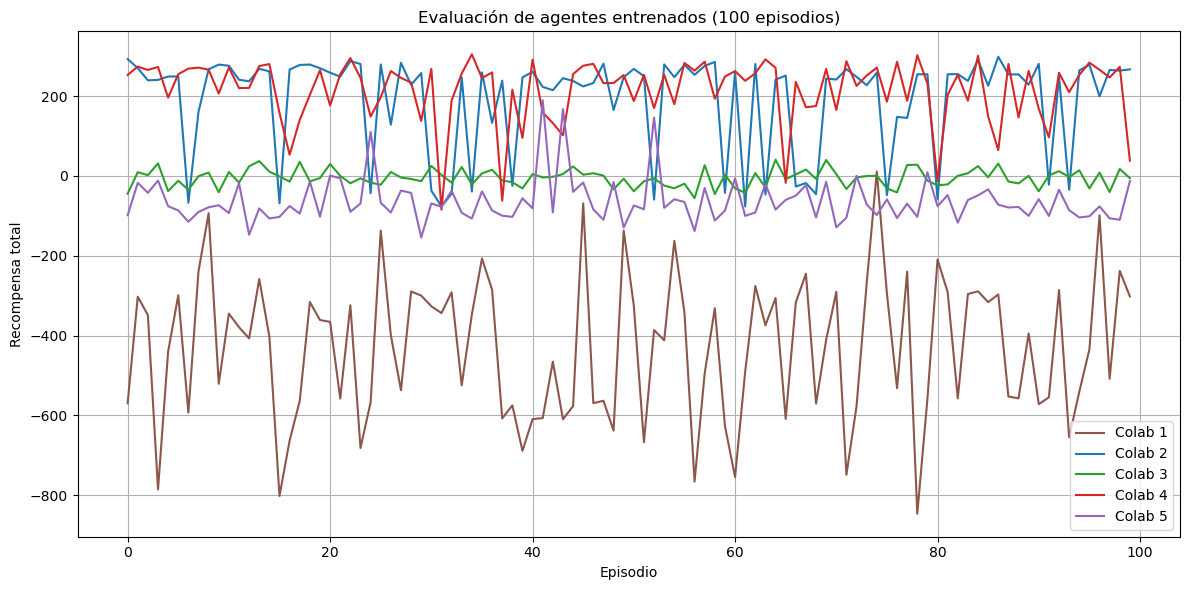


--- Porcentaje de resolución (Recompensa >= 100) ---
Colab 1: 0.00%
Colab 2: 81.00%
Colab 3: 0.00%
Colab 4: 91.00%
Colab 5: 4.00%


In [111]:




plt.figure(figsize=(12, 6))
#plt.plot(rewards_0, label='Último probado', color=colors[0])
plt.plot(rewards_1, label='Colab 1', color=colors[1])
plt.plot(rewards_2, label='Colab 2', color=colors[2])
plt.plot(rewards_3, label='Colab 3', color=colors[3])
plt.plot(rewards_4, label='Colab 4', color=colors[4])
plt.plot(rewards_5, label='Colab 5', color=colors[5])

plt.title('Evaluación de agentes entrenados (100 episodios)')
plt.xlabel('Episodio')
plt.ylabel('Recompensa total')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("\n--- Porcentaje de resolución (Recompensa >= 100) ---")
#print(f"Último probado: {calculate_resolution_percentage(rewards_0):.2f}%")
print(f"Colab 1: {calculate_resolution_percentage(rewards_1):.2f}%")
print(f"Colab 2: {calculate_resolution_percentage(rewards_2):.2f}%")
print(f"Colab 3: {calculate_resolution_percentage(rewards_3):.2f}%")
print(f"Colab 4: {calculate_resolution_percentage(rewards_4):.2f}%")
print(f"Colab 5: {calculate_resolution_percentage(rewards_5):.2f}%")

